**IMPORATING THE DATASET**

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/MiningProcess_Flotation_Plant_Database.csv"



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv(path)
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    cross_val_predict,
    train_test_split,
)

from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler)

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [ ]:
%matplotlib inline

**DATA** **PREPOCESSING AND VISULALIZATION**

In [ ]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('%','percent')
data.columns= data.columns.str.lower()

# Getting the column for the dataset
colname=data.columns
colname
# Correcting the integer formats
for col in colname:
    data[col]=data[col].str.replace(',','.')
data.head()

,date,percent_iron_feed,percent_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,percent_iron_concentrate,percent_silica_concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31


In [ ]:
# Converting string columns to numeric depending on the column types based on the technical details
colname1=colname[1::]
colname1
for col in colname1:
    data[col]=data[col].apply(pd.to_numeric) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   percent_iron_feed             737453 non-null  float64
 2   percent_silica_feed           737453 non-null  float64
 3   starch_flow                   737453 non-null  float64
 4   amina_flow                    737453 non-null  float64
 5   ore_pulp_flow                 737453 non-null  float64
 6   ore_pulp_ph                   737453 non-null  float64
 7   ore_pulp_density              737453 non-null  float64
 8   flotation_column_01_air_flow  737453 non-null  float64
 9   flotation_column_02_air_flow  737453 non-null  float64
 10  flotation_column_03_air_flow  737453 non-null  float64
 11  flotation_column_04_air_flow  737453 non-null  float64
 12  flotation_column_05_air_flow  737453 non-nul

<Figure size 1.08e+06x780000 with 0 Axes>

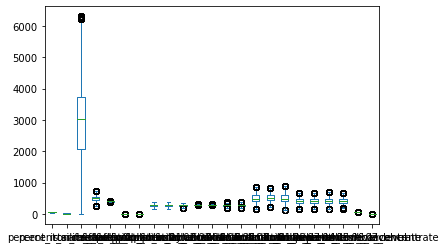

In [ ]:
# Outliers are checked for few numeric columns through Boxplots

plt.figure(figsize=(3600,2600),dpi=300)

data.plot(kind='box')
plt.show()

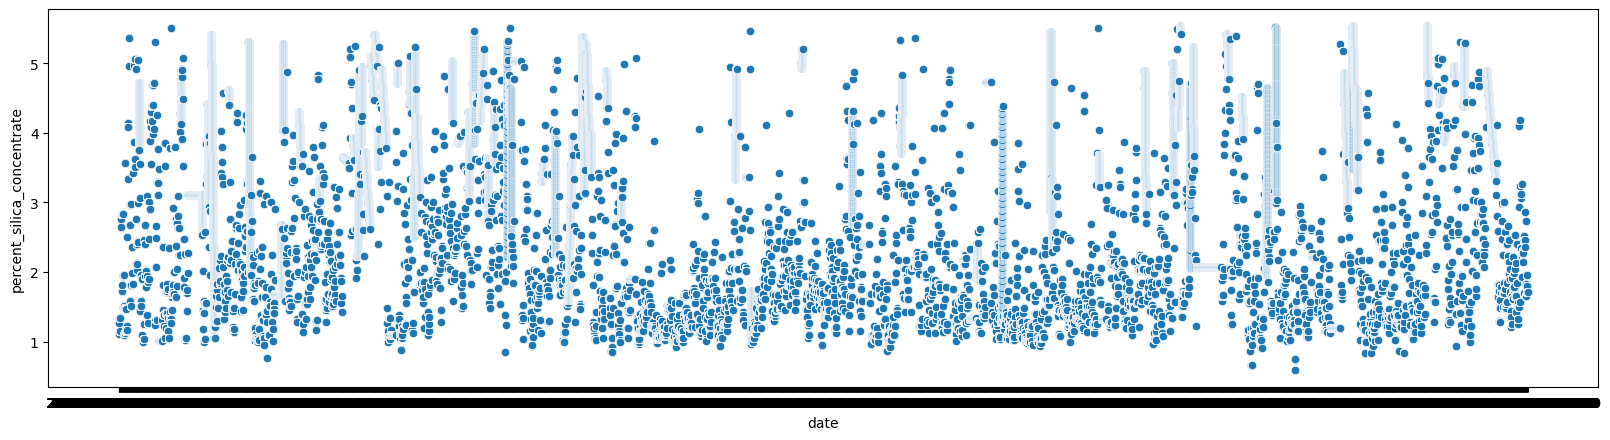

In [ ]:
# Create a scatter plot to observe the distribution of silica % with time 
plt.figure(figsize=(20,5),dpi=100)
sns.scatterplot(x=data['date'],y=data['percent_silica_concentrate'])

In [ ]:
df=data.drop('date', axis=1)
df.corr()

,percent_iron_feed,percent_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,flotation_column_03_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,percent_iron_concentrate,percent_silica_concentrate
percent_iron_feed,1.000000,-0.971833,0.027981,-0.088148,0.160705,0.007451,-0.125518,-0.062379,-0.169430,-0.062207,...,-0.016356,0.029499,0.020839,0.015191,0.016108,0.023288,0.003694,0.025723,0.055424,-0.077052
percent_silica_feed,-0.971833,1.000000,-0.016073,0.078735,-0.150788,0.008014,0.104497,0.091757,0.182573,0.084197,...,0.045300,-0.038291,-0.036968,-0.022675,-0.034050,-0.043753,-0.019502,-0.046413,-0.044168,0.072724
starch_flow,0.027981,-0.016073,1.000000,0.254748,0.042703,0.263020,0.226004,0.191131,0.186585,0.183288,...,0.194786,-0.294380,-0.278422,-0.301757,-0.012612,-0.055528,-0.071722,-0.038193,0.069657,-0.066394
amina_flow,-0.088148,0.078735,0.254748,1.000000,0.212252,0.123690,0.655788,0.111321,0.122911,0.101957,...,0.079558,-0.268536,-0.234454,-0.286968,-0.180301,-0.211712,-0.197758,-0.168050,-0.110148,0.156701
ore_pulp_flow,0.160705,-0.150788,0.042703,0.212252,1.000000,0.118376,0.012279,-0.137866,-0.118549,-0.140761,...,-0.140914,-0.008579,-0.008049,-0.054351,-0.009784,0.002260,-0.016661,0.016585,0.083120,0.008222
ore_pulp_ph,0.007451,0.008014,0.263020,0.123690,0.118376,1.000000,0.115189,0.163073,0.144935,0.193372,...,0.174684,-0.165739,-0.153557,-0.140070,0.046371,0.013041,-0.075034,0.019021,0.192992,-0.147739
ore_pulp_density,-0.125518,0.104497,0.226004,0.655788,0.012279,0.115189,1.000000,-0.005142,0.025794,-0.031673,...,-0.052294,-0.111608,-0.093024,-0.149584,-0.087761,-0.140881,-0.099817,-0.086067,0.015580,0.046984
flotation_column_01_air_flow,-0.062379,0.091757,0.191131,0.111321,-0.137866,0.163073,-0.005142,1.000000,0.848277,0.954528,...,0.646768,-0.441573,-0.425758,-0.371791,-0.061940,-0.091386,-0.118992,-0.110726,0.098599,-0.219158
flotation_column_02_air_flow,-0.169430,0.182573,0.186585,0.122911,-0.118549,0.144935,0.025794,0.848277,1.000000,0.860438,...,0.578578,-0.432033,-0.422855,-0.365535,-0.074312,-0.110512,-0.117619,-0.112403,0.058744,-0.167398
flotation_column_03_air_flow,-0.062207,0.084197,0.183288,0.101957,-0.140761,0.193372,-0.031673,0.954528,0.860438,1.000000,...,0.649435,-0.440823,-0.420932,-0.364773,-0.046685,-0.063693,-0.100419,-0.085294,0.100136,-0.218891


In [ ]:
# Creating function for outlier removal.
def remove_outlier(df_in, col_name): 
    Q1 = df_in[col_name].quantile(0.01) 
    Q3 = df_in[col_name].quantile(0.99) 
    IQR=Q3-Q1               # Interquantile range
    df_out = df_in.loc[(df_in[col_name] >= (Q1 - 1.5 * IQR)) & (df_in[col_name] <= (Q3 + 1.5 * IQR))]
    return(df_out)

# Removing outliers in numeric columns
for i in colname1:
    df= remove_outlier(df,i)

In [ ]:
#checking for duplicates
df[df.duplicated(subset = None, keep = False)]
# drop duplicated records, retain only one copy for each
df = pd.DataFrame.drop_duplicates(data)
df.shape

(736282, 24)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe()

,percent_iron_feed,percent_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,flotation_column_03_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,percent_iron_concentrate,percent_silica_concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


In [ ]:
colname2=colname1[:-1]
colname2

Index(['percent_iron_feed', 'percent_silica_feed', 'starch_flow', 'amina_flow',
       'ore_pulp_flow', 'ore_pulp_ph', 'ore_pulp_density',
       'flotation_column_01_air_flow', 'flotation_column_02_air_flow',
       'flotation_column_03_air_flow', 'flotation_column_04_air_flow',
       'flotation_column_05_air_flow', 'flotation_column_06_air_flow',
       'flotation_column_07_air_flow', 'flotation_column_01_level',
       'flotation_column_02_level', 'flotation_column_03_level',
       'flotation_column_04_level', 'flotation_column_05_level',
       'flotation_column_06_level', 'flotation_column_07_level',
       'percent_iron_concentrate'],
      dtype='object')

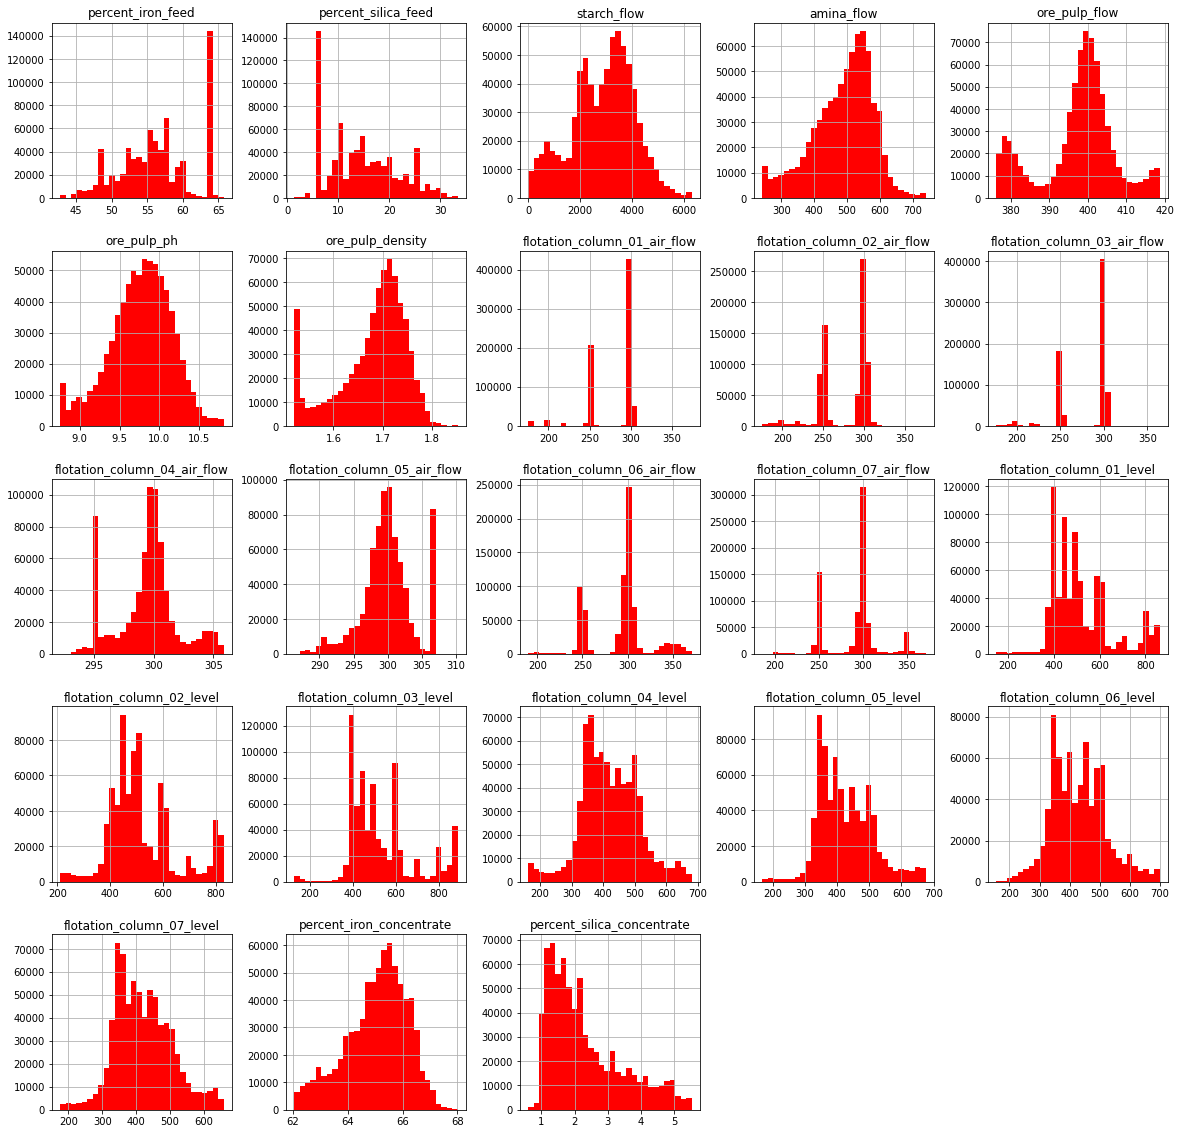

In [ ]:
# histogram plot of all features
df.hist(bins=30, figsize= (20, 20), color='r')
plt.title('Histogram plot of all features')
plt.show()

In [ ]:
#From this pair plot, we can infer that there is a relationship between iron feed and silica feed.
#Also, a relationship between silica concentrate and iron concentrate.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


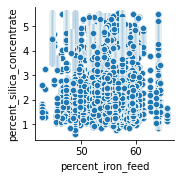

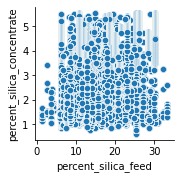

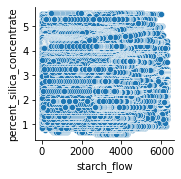

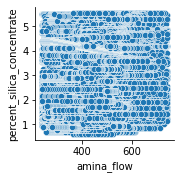

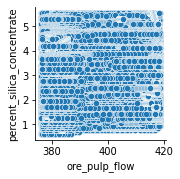

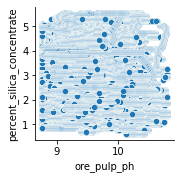

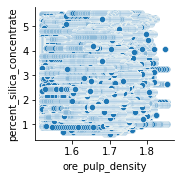

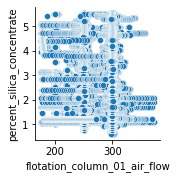

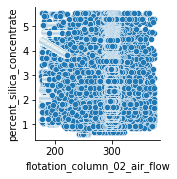

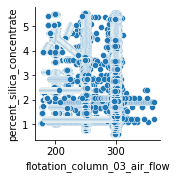

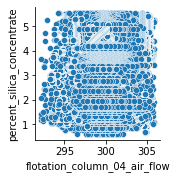

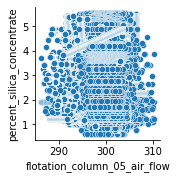

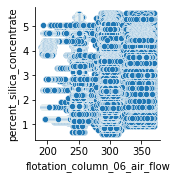

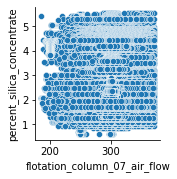

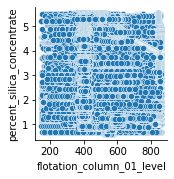

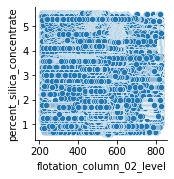

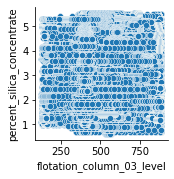

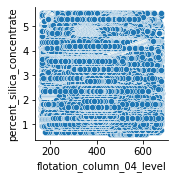

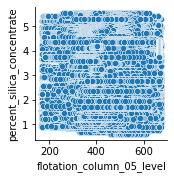

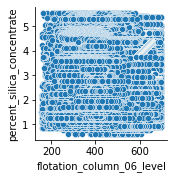

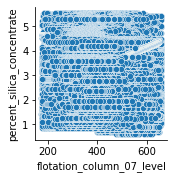

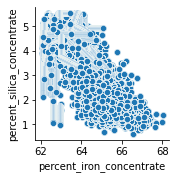

In [ ]:
# Checking the correlation between dependent and independent variables
for col in colname2:
    sns.pairplot(data=df,x_vars=col,y_vars=['percent_silica_concentrate'])

In [ ]:
#Comment: Apart from the % iron concentrate, we dont see much correlation with any other parameter.


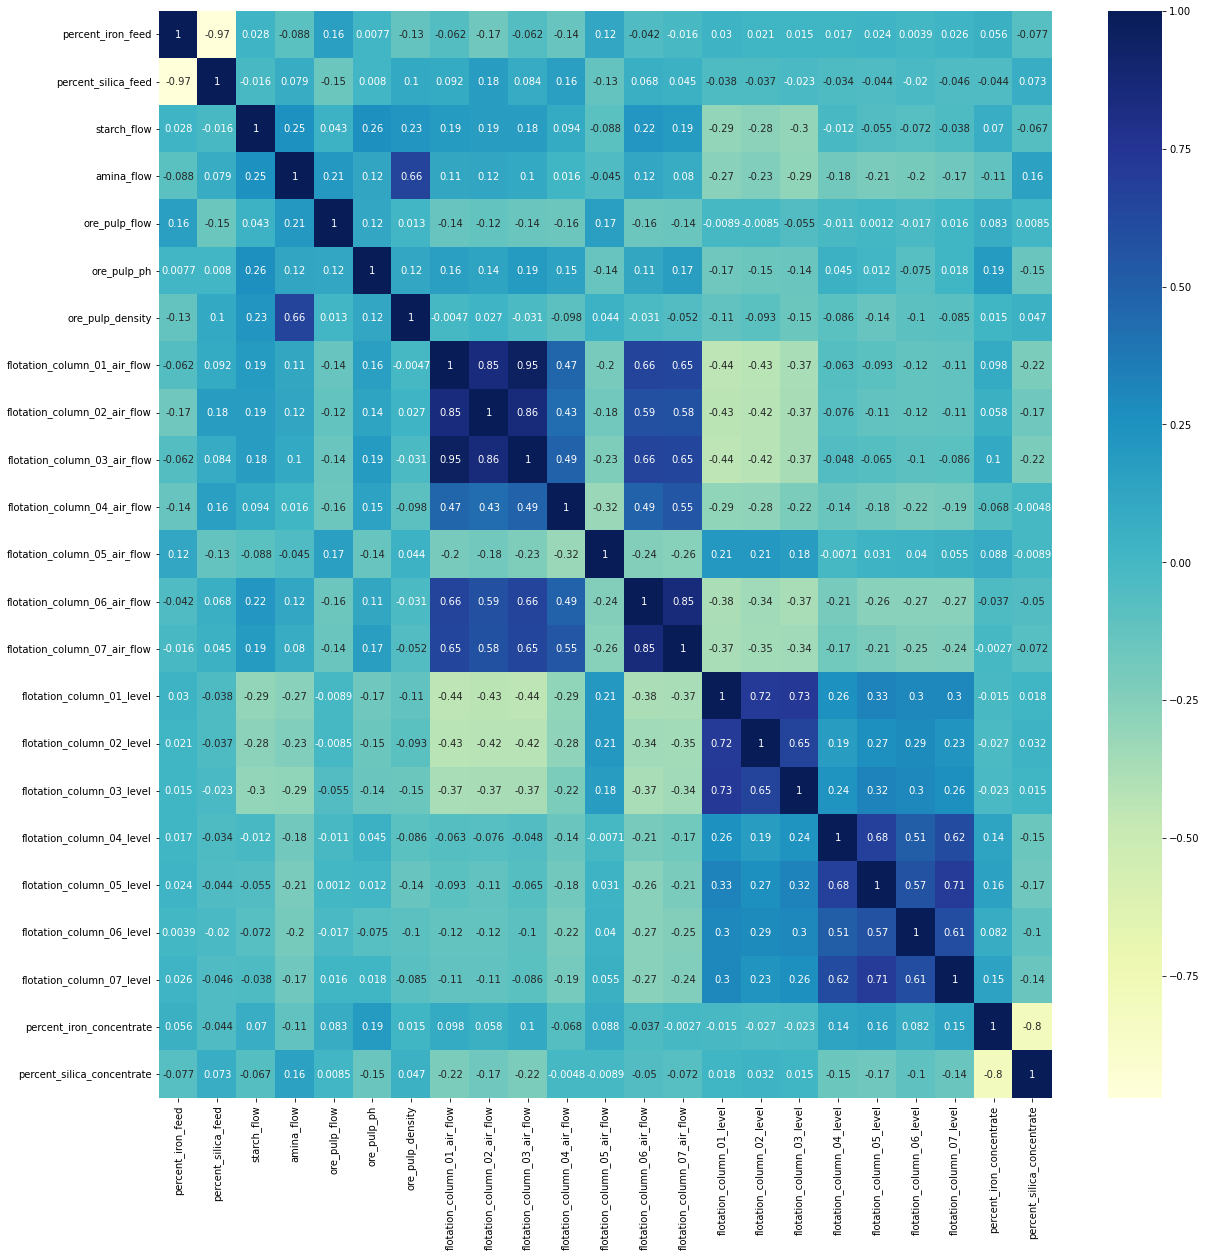

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(df[colname1].corr(), cmap="YlGnBu", annot = True)
plt.show()

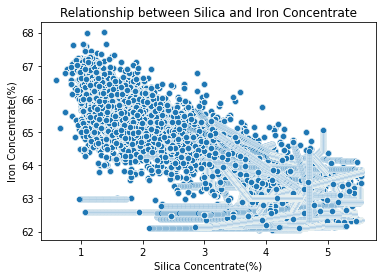

In [ ]:
#Plot the scatterplot between % Silica Concentrate and Iron Concentrate and try to relate to the correlation matrix.
sns.scatterplot(x='percent_silica_concentrate', y='percent_iron_concentrate', data=data)
plt.xlabel('Silica Concentrate(%)')
plt.ylabel('Iron Concentrate(%)')
plt.title('Relationship between Silica and Iron Concentrate')
plt.show()

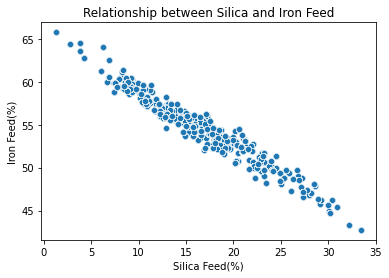

In [ ]:
#Plot the scatterplot between % Iron Feed and % Silica Feed and try to relate to the correlation matrix.
sns.scatterplot(x='percent_silica_feed', y='percent_iron_feed', data=data)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

**TRAIN AND EVALUATE A MULTILINAR MODEL**

In [ ]:
# dropping the silica concentrate
df_iron = df.drop(columns = ['percent_silica_concentrate'])
#we define our iron target with the silica conentrate
df_iron_target = df['percent_silica_concentrate']

In [ ]:
df_iron.shape


(737453, 22)

In [ ]:
df_iron_target.shape

(737453,)

In [ ]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [ ]:
# reshaping the array to be the way scikit learn expects
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(737453, 1)

In [ ]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iron, df_iron_target, test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((589962, 22), (147491, 22))

In [ ]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression() #build linear regression model
model.fit(X_train_scaled,y_train) #fitting the training data
predicted=model.predict(X_test_scaled) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
#With the MSE we are asking ourselves how good is a linear regression model in predicting the output variable based on the input variables?

#Another way to measure the quality of a prediction is by calculating the R_squared 
#which determines how much of the variance of the output around its mean is explained by the variance of the inputs.

MSE 0.4054555733504483
R squared 0.677515901644576


**TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS**

In [ ]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model

DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train_scaled, y_train)
dt_model.score(X_test_scaled, y_test)

0.9938357611558205

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

rf_model.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8873756971665545

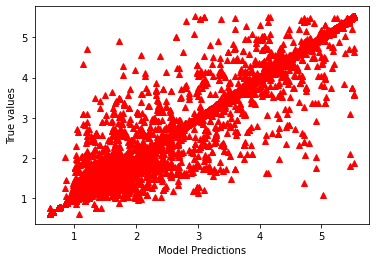

In [ ]:
y_predict = dt_model.predict(X_test_scaled)
plt.plot(y_predict, y_test, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

**TRAIN AND EVALUATE A KNN REGRESSION MODEL**

**KNN regression**
:K-NN stands for K-Nearest Neighbors. It is an algorithm used for the prediction of a continuous variable. A non-parametric and a prediction problem; it does not care about the relationship between the predictor x the response variable y. It takes k nearest neighbors whose distances form that point are minimum and computes the average of those values.

In [ ]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iron, df_iron_target, test_size=0.2,random_state=0)
X_train.shape, X_test.shape


((589962, 22), (147491, 22))

**ELBOW PLOT**


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,15,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train_scaled,y_train)
    y_knn_pred=model_knn.predict(X_test_scaled)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse

In [ ]:
#Plotting the results
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [ ]:
# implementing theK-Nearest Neighbour(KNN) algorithm with the minimum and optimal value of k(k=)
RegModel = KNeighborsRegressor(n_neighbors=)
#Printing all the parameters of KNN
print(RegModel)
#Creating the model on Training Data
KNN=RegModel.fit(X_train_scaled,y_train)
prediction=KNN.predict(X_test_scaled)
#Measuring of the fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train_scaled)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))


**From the above results, it can be seen that, decision tree model out-performs the other models.**